<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221021_Ridge_and_Lasso_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/10/09/ridge-and-lasso-regression-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

### Libraries and import data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Advertising.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Cleaning and plotting

In [18]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
def scatterplot_samples(feature, target):
  plt.figure(figsize=(15,8))
  plt.scatter(data[feature], data[target], c='black')
  plt.xlabel('Money Spend on {} ads ($)'.format(feature))
  plt.ylabel('Sales (k$)')
  plt.show()

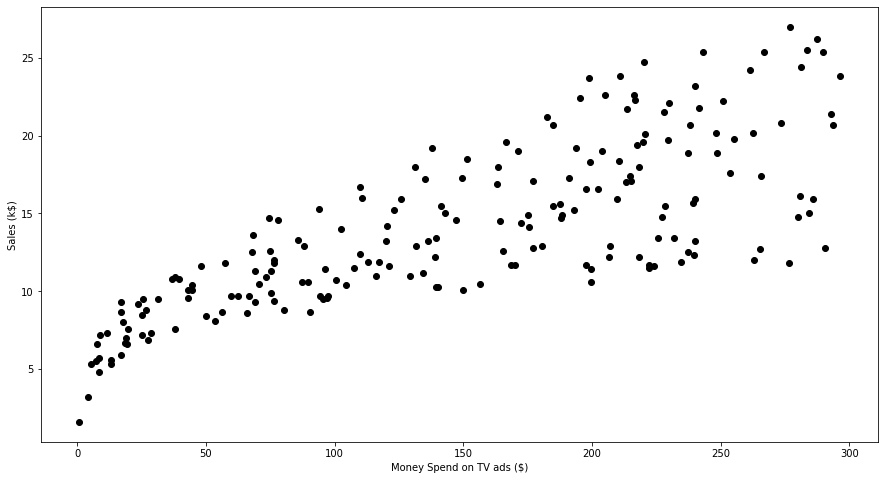

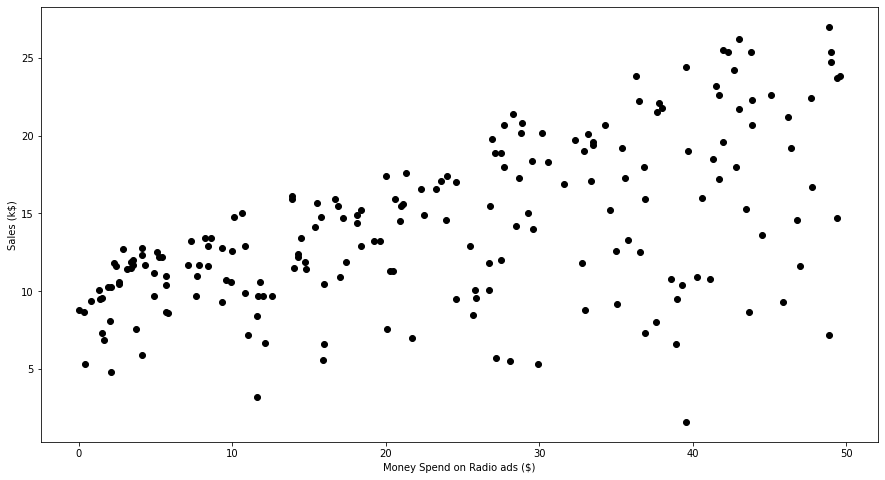

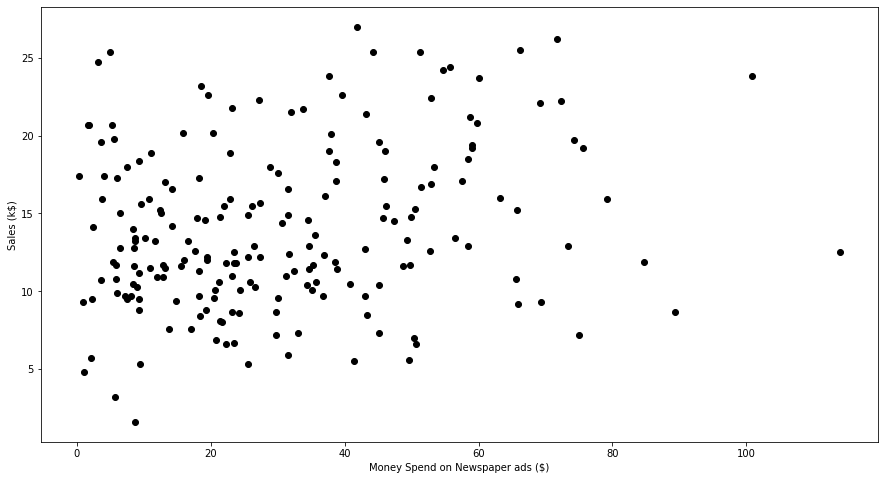

In [20]:
for i in ['TV', 'Radio', 'Newspaper']:
  scatterplot_samples(i, 'Sales')

## Linear Regression

In [21]:
xs = data.drop(['Sales'], axis=1)
y = data['Sales'].values.reshape(-1,1)

In [22]:
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSE)
mean_MSE

-3.0729465971002106

### Ridge

In [24]:
ridge = Ridge()
params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(xs,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 20}
-3.072671338341143


### Lasso

In [26]:
lasso = Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(xs, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.090e+02, tolerance: 4.383e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+02, tolerance: 4.503e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [27]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1}
-3.041405896751369
